In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from random import randint
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [17]:
df = pd.read_csv("../MachinehackGlassQualityPrediction/Glass_Quality_Participants_Data/Train.csv")
tf = pd.read_csv("../MachinehackGlassQualityPrediction/Glass_Quality_Participants_Data/Test.csv")

#sf = pd.read_excel("../MachinehackGlassQualityPrediction/Glass_Quality_Participants_Data/Sample_Submission.xlsx")


In [18]:
df.head()
#sf.head()


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


# EDA

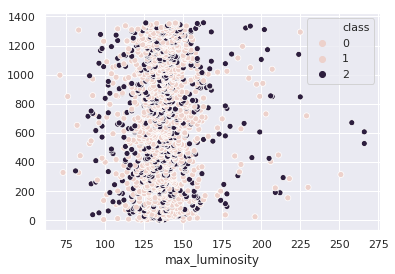

In [19]:
sns.set()
ax = sns.scatterplot(x="max_luminosity", y =df.index, hue ='class' ,data=df)

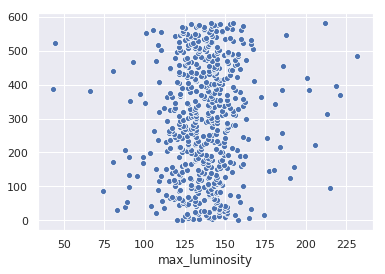

In [20]:
sns.set()
ax = sns.scatterplot(x="max_luminosity", y =tf.index ,data=tf)

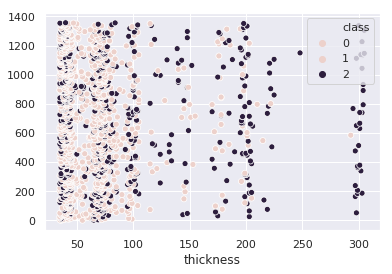

In [21]:
sns.set()
ax = sns.scatterplot(x="thickness", y =df.index, hue ='class' ,data=df)

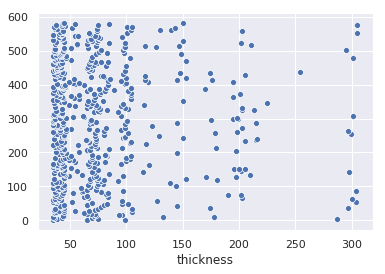

In [22]:
sns.set()
ax = sns.scatterplot(x="thickness", y =tf.index ,data=tf)

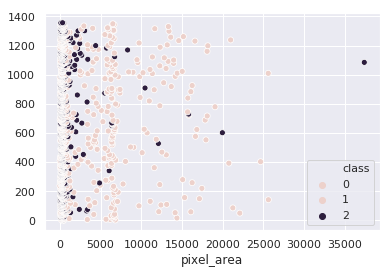

In [23]:
sns.set()
ax = sns.scatterplot(x="pixel_area", y =df.index, hue ='class' ,data=df)

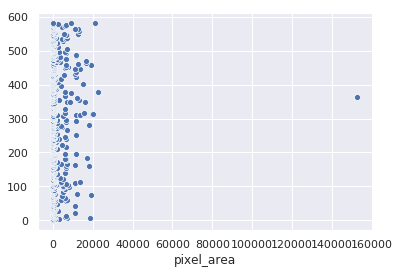

In [24]:
sns.set()
ax = sns.scatterplot(x="pixel_area", y =tf.index ,data=tf)

In [25]:
from scipy import stats

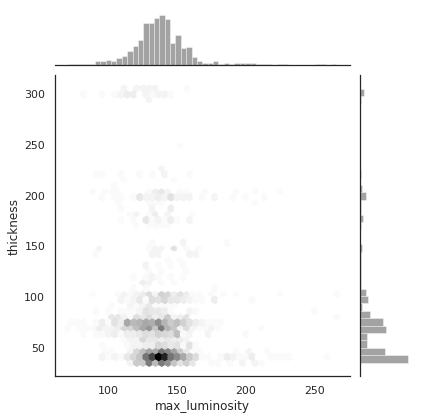

In [26]:
with sns.axes_style("white"):
    sns.jointplot(x=df['max_luminosity'], y=df['thickness'], kind="hex", color="k");

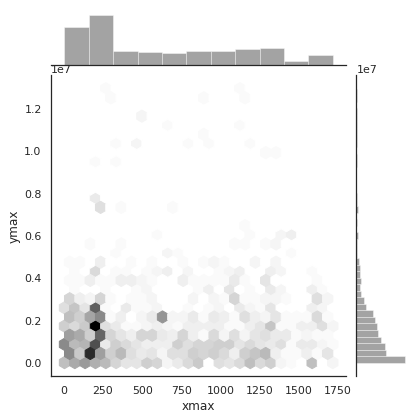

In [27]:
with sns.axes_style("white"):
    sns.jointplot(x=df['xmax'], y=df['ymax'], kind="hex", color="k");

In [65]:
cf =df.copy()
df.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,5.010635,36,12.000000,13.114877,973.254848,973.309817,20.952327,20.954696,0,0,1,0,0,1
1,1,0,4.897840,55,33.823069,33.941125,1542.419528,1542.602995,18.138357,18.144024,1,0,0,0,0,1
2,1,0,4.905275,65,30.822070,31.208973,1019.039744,1018.211177,17.320508,17.323989,0,0,0,0,0,2
3,0,1,4.812184,35,6.403124,14.832397,1305.978560,1305.987749,82.480301,82.485021,0,0,1,0,0,1
4,1,0,4.927254,69,21.494185,21.587033,1043.131823,1042.391001,15.842980,15.855660,0,0,0,0,0,2


In [66]:
bureau_agg = cf.groupby('max_luminosity', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

max_luminosity grade_A_Component_1                  grade_A_Component_2  \
                               count mean max min sum               count   
0       4.262680                   1  1.0   1   1   1                   1   
1       4.290459                   1  1.0   1   1   1                   1   
2       4.330733                   1  1.0   1   1   1                   1   
3       4.394449                   1  1.0   1   1   1                   1   
4       4.406719                   1  1.0   1   1   1                   1   

                ... x_component_5                  class                   
  mean max min  ...         count mean max min sum count mean max min sum  
0  0.0   0   0  ...             1  0.0   0   0   0     1  1.0   1   1   1  
1  0.0   0   0  ...             1  0.0   0   0   0     1  1.0   1   1   1  
2  0.0   0   0  ...             1  0.0   0   0   0     1  1.0   1   1   1  
3  0.0   0   0  ...             1  0.0   0   0   0     1  2.0   2   2   2  
4  0.0   0   0  ...             1  0.0   0   0   0     1  1.0   1   1   1  

[5 rows x 76 columns]

In [67]:
columns = ['max_luminosity']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'max_luminosity':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [68]:
bureau_agg.columns = columns
bureau_agg.head()

,max_luminosity,bureau_grade_A_Component_1_count,bureau_grade_A_Component_1_mean,bureau_grade_A_Component_1_max,bureau_grade_A_Component_1_min,bureau_grade_A_Component_1_sum,bureau_grade_A_Component_2_count,bureau_grade_A_Component_2_mean,bureau_grade_A_Component_2_max,bureau_grade_A_Component_2_min,...,bureau_x_component_5_count,bureau_x_component_5_mean,bureau_x_component_5_max,bureau_x_component_5_min,bureau_x_component_5_sum,bureau_class_count,bureau_class_mean,bureau_class_max,bureau_class_min,bureau_class_sum
0,4.262680,1,1.0,1,1,1,1,0.0,0,0,...,1,0.0,0,0,0,1,1.0,1,1,1
1,4.290459,1,1.0,1,1,1,1,0.0,0,0,...,1,0.0,0,0,0,1,1.0,1,1,1
2,4.330733,1,1.0,1,1,1,1,0.0,0,0,...,1,0.0,0,0,0,1,1.0,1,1,1
3,4.394449,1,1.0,1,1,1,1,0.0,0,0,...,1,0.0,0,0,0,1,2.0,2,2,2
4,4.406719,1,1.0,1,1,1,1,0.0,0,0,...,1,0.0,0,0,0,1,1.0,1,1,1


In [70]:
previous_loan_counts = df.groupby('max_luminosity', as_index=False)['max_luminosity'].count() #.rename(columns = {'max_luminosity': 'previous_loan_counts'})
#previous_loan_counts.head()

ValueError: cannot insert max_luminosity, already exists

In [29]:
df['xmax'] = np.sqrt(df['xmax'])
df['ymax'] = np.sqrt(df['ymax'])
df['xmin'] = np.sqrt(df['xmin'])
df['ymin'] = np.sqrt(df['ymin'])

df['max_luminosity'] = np.log(df['max_luminosity'])
df['pixel_area'] = np.sqrt(df['pixel_area'])
df['log_area'] = np.sqrt(df['log_area'])

#df = df.drop(['pixel_area'],axis=1)
df

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,5.010635,36,12.000000,13.114877,973.254848,973.309817,20.952327,20.954696,0,0,1,0,0,1
1,1,0,4.897840,55,33.823069,33.941125,1542.419528,1542.602995,18.138357,18.144024,1,0,0,0,0,1
2,1,0,4.905275,65,30.822070,31.208973,1019.039744,1018.211177,17.320508,17.323989,0,0,0,0,0,2
3,0,1,4.812184,35,6.403124,14.832397,1305.978560,1305.987749,82.480301,82.485021,0,0,1,0,0,1
4,1,0,4.927254,69,21.494185,21.587033,1043.131823,1042.391001,15.842980,15.855660,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,4.890349,37,24.145393,24.474477,234.111085,235.446385,17.860571,17.867022,0,0,0,0,0,1
1354,0,1,4.976734,35,34.190642,34.525353,541.552398,541.584712,21.610183,21.618263,0,0,0,0,0,2
1355,0,1,4.976734,47,34.597688,34.684290,904.824292,904.979558,17.776389,17.789030,0,0,0,1,0,1
1356,1,0,4.836282,84,25.514702,25.922963,1470.475433,1470.713772,11.045361,11.068811,0,0,0,0,0,2


In [30]:
#df[['xmin','xmax','ymin','ymax','max_luminosity','thickness','log_area']].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avo

In [31]:
# adding new features 
import itertools
interactions = pd.DataFrame(index=df.index)
interactions

""
0
1
2
3
4
...
1353
1354
1355
1356


In [32]:
features =['max_luminosity','thickness','pixel_area']
for col1 ,col2 in  itertools.combinations(features,2):
    
    newcolname = col1 + "_" + col2 
    new_values = df[col1].map(str) + "_" + df[col2].map(str)
    interactions[newcolname] = new_values


In [33]:
from collections import Counter
interactions


,max_luminosity_thickness,max_luminosity_pixel_area,thickness_pixel_area
0,5.0106352940962555_36,5.0106352940962555_20.952326839756964,36_20.952326839756964
1,4.897839799950911_55,4.897839799950911_18.138357147217054,55_18.138357147217054
2,4.90527477843843_65,4.90527477843843_17.320508075688775,65_17.320508075688775
3,4.812184355372417_35,4.812184355372417_82.48030067840442,35_82.48030067840442
4,4.927253685157205_69,4.927253685157205_15.84297951775486,69_15.84297951775486
...,...,...,...
1353,4.890349128221754_37,4.890349128221754_17.86057109949175,37_17.86057109949175
1354,4.976733742420574_35,4.976733742420574_21.61018278497431,35_21.61018278497431
1355,4.976733742420574_47,4.976733742420574_17.776388834631177,47_17.776388834631177
1356,4.836281906951478_84,4.836281906951478_11.045361017187261,84_11.045361017187261


# low accuracy from interactions 
## no use of it in logistic regressions

In [34]:
zf = df#.join(interactions)
Counter(zf['max_luminosity'])
zf['max_luminosity'].nunique()
zf['thickness'].nunique()


143

In [35]:
# discrestisation on max_luminosity an thickness

In [36]:
# kmeans

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [40]:
X = np.array(df['max_luminosity']).reshape(-1,1)

In [41]:
X

array([[5.01063529],
       [4.8978398 ],
       [4.90527478],
       ...,
       [4.97673374],
       [4.83628191],
       [5.0937502 ]])

In [58]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

for k in [3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
        
    km = KMeans(n_clusters=k, random_state=10)
    cluster_labels = km.fit_predict(X)

    #silhouette_avg = silhouette_score((np.array(df['max_luminosity'])).reshape(-1,1), cluster_labels)
    #print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
        
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(km.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, km.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = km.inertia_ 

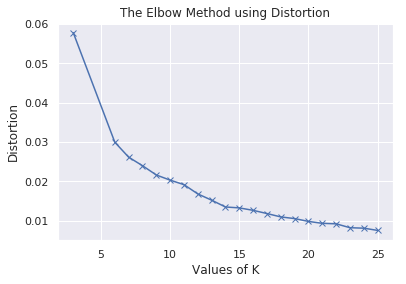

In [59]:
K =[3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

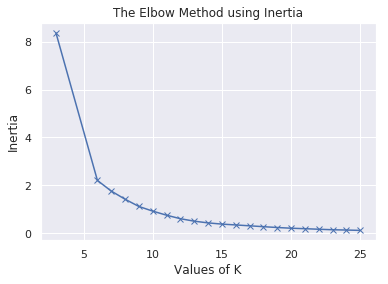

In [60]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [23]:
for n_clusters in [3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict((np.array(df['max_luminosity'])).reshape(-1,1))

    silhouette_avg = silhouette_score((np.array(df['max_luminosity'])).reshape(-1,1), cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.5188750037846378
For n_clusters = 6 The average silhouette_score is : 0.5364895562312879
For n_clusters = 7 The average silhouette_score is : 0.517317381493446
For n_clusters = 8 The average silhouette_score is : 0.5208326587913823
For n_clusters = 9 The average silhouette_score is : 0.5245884820053189
For n_clusters = 10 The average silhouette_score is : 0.5280569894453808
For n_clusters = 11 The average silhouette_score is : 0.5347138185501892
For n_clusters = 12 The average silhouette_score is : 0.5380874437860784
For n_clusters = 13 The average silhouette_score is : 0.5426849353317699
For n_clusters = 14 The average silhouette_score is : 0.5545666911022948
For n_clusters = 15 The average silhouette_score is : 0.5413957230180227
For n_clusters = 16 The average silhouette_score is : 0.5512514881317365
For n_clusters = 17 The average silhouette_score is : 0.5380432749428746
For n_clusters = 18 The average silhouette_score is : 0.5

In [26]:
# 6 may be a good value

from sklearn.preprocessing import KBinsDiscretizer

In [27]:
#zf =df #.drop(['pixel_area'],axis=1)
zf

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,5.010635,36,12.000000,13.114877,973.254848,973.309817,20.952327,20.954696,0,0,1,0,0,1
1,1,0,4.897840,55,33.823069,33.941125,1542.419528,1542.602995,18.138357,18.144024,1,0,0,0,0,1
2,1,0,4.905275,65,30.822070,31.208973,1019.039744,1018.211177,17.320508,17.323989,0,0,0,0,0,2
3,0,1,4.812184,35,6.403124,14.832397,1305.978560,1305.987749,82.480301,82.485021,0,0,1,0,0,1
4,1,0,4.927254,69,21.494185,21.587033,1043.131823,1042.391001,15.842980,15.855660,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,4.890349,37,24.145393,24.474477,234.111085,235.446385,17.860571,17.867022,0,0,0,0,0,1
1354,0,1,4.976734,35,34.190642,34.525353,541.552398,541.584712,21.610183,21.618263,0,0,0,0,0,2
1355,0,1,4.976734,47,34.597688,34.684290,904.824292,904.979558,17.776389,17.789030,0,0,0,1,0,1
1356,1,0,4.836282,84,25.514702,25.922963,1470.475433,1470.713772,11.045361,11.068811,0,0,0,0,0,2


In [28]:
y = zf['class']

# To keep things simple, we'll use only numerical predictors
X = zf.drop(['class'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.55, test_size=0.40,random_state=0)

In [29]:
enc = KBinsDiscretizer(n_bins=11, encode='ordinal', strategy='kmeans')
enc.fit(np.array(X_train['max_luminosity']).reshape(-1,1))
X_train['max_luminosity_binned'] = enc.transform(np.array(X_train['max_luminosity']).reshape(-1,1))
X_valid['max_luminosity_binned'] = enc.transform(np.array(X_valid['max_luminosity']).reshape(-1,1))


/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 11 no of bins for max_lumonosity for logistic reg
##### may reqire some other number of bins for other models

# thickness

In [30]:
for n_clusters in [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict((np.array(df['thickness'])).reshape(-1,1))

    silhouette_avg = silhouette_score((np.array(df['thickness'])).reshape(-1,1), cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.6516103030895877
For n_clusters = 4 The average silhouette_score is : 0.6965958827306715
For n_clusters = 5 The average silhouette_score is : 0.7298557953794556
For n_clusters = 6 The average silhouette_score is : 0.7369027275875419
For n_clusters = 7 The average silhouette_score is : 0.7357490976441743
For n_clusters = 8 The average silhouette_score is : 0.6706039526741562
For n_clusters = 9 The average silhouette_score is : 0.6338558377385228
For n_clusters = 10 The average silhouette_score is : 0.6360546342068649
For n_clusters = 11 The average silhouette_score is : 0.6430663633797241
For n_clusters = 12 The average silhouette_score is : 0.6007512902632771
For n_clusters = 13 The average silhouette_score is : 0.6320541795171513
For n_clusters = 14 The average silhouette_score is : 0.6237066371456582
For n_clusters = 15 The average silhouette_score is : 0.6173488436773741
For n_clusters = 16 The average silhouette_score is : 0.61

In [31]:
enc = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='kmeans')
enc.fit(np.array(X_train['thickness']).reshape(-1,1))
X_train['thickness_binned'] = enc.transform(np.array(X_train['thickness']).reshape(-1,1))
X_valid['thickness_binned'] = enc.transform(np.array(X_valid['thickness']).reshape(-1,1))


/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
# X_train = X_train.join(pd.get_dummies(X_train['thickness_binned']))

In [33]:
# X_valid = X_valid.join(pd.get_dummies(X_valid['thickness_binned']))

In [34]:
# X_train
# X_valid['0.0'] = 0

In [33]:
X_train.shape
#X_train['max_luminosity_thickness']

(746, 17)

In [34]:
# def normalabelencoder(train,test,cols):
#     from sklearn.preprocessing import LabelEncoder

#     label_enc = LabelEncoder()
    
#     print(cols)
#     for col in cols:
#         label_enc.fit(train[col])
#         train[col] = label_enc.transform(train[col])
#         test[col] = label_enc.transform(test[col])
    
#     return train,test




# def targetencoding(train,test,y_train):
#     import category_encoders as ce
#     # Create the encoder itself
#     cat_features = ['max_luminosity_thickness','max_luminosity_pixel_area','thickness_pixel_area']
#     print(f'targest emcoding for features {cat_features}')
#     target_enc = ce.TargetEncoder(cols=cat_features)

    

#     # Fit the encoder using the categorical features and target
#     target_enc.fit(train[cat_features], y_train)
    

#     # Transform the features, rename the columns with _target suffix, and join to dataframe
#     traintrgtenc = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
#     testtrgtenc = test.join(target_enc.transform(test[cat_features]).add_suffix('_target'))

#     traintrgtenc = traintrgtenc.drop(cat_features, axis =1)
#     testtrgtenc = testtrgtenc.drop(cat_features, axis =1)

    
#     print(traintrgtenc.shape,testtrgtenc.shape)
    
#     return traintrgtenc,testtrgtenc

In [35]:
# X_trainlbl,X_validlbl = targetencoding(X_train,X_valid,y_train)

In [36]:
#X_trainlbl

In [37]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
    
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    
    
    clf1 = LogisticRegression(random_state=2) #LogisticRegression(random_state=2) #RandomForestClassifier(random_state=2) #LogisticRegression(random_state=2)
    clf1.fit(X_train,y_train)
    
    
    preds = clf1.predict(X_valid)
    predsforlog = clf1.predict_proba(X_valid)
    
    
    target_names = ['class_0','class_1']
    print(classification_report(y_valid, preds, target_names=target_names,labels= [1,2]))
    
    print(confusion_matrix(y_valid,preds))
    return log_loss(y_valid,predsforlog,normalize=True) 

In [38]:
score_dataset(X_train,X_valid,y_train,y_valid)

              precision    recall  f1-score   support

     class_0       0.81      0.92      0.86       344
     class_1       0.83      0.63      0.72       200

    accuracy                           0.82       544
   macro avg       0.82      0.78      0.79       544
weighted avg       0.82      0.82      0.81       544

[[318  26]
 [ 74 126]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3841353409229684

# time to develop models

In [39]:
X_train

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,max_luminosity_binned,thickness_binned
101,0,1,4.828314,43,7.211103,13.228757,498.706326,500.566679,60.497934,60.501273,0,0,1,0,0,4.0,0.0
13,1,0,4.682131,65,40.570926,40.853396,1721.291085,1720.771629,33.719431,33.729749,0,0,0,0,0,3.0,1.0
1105,0,1,5.298317,37,18.055470,19.078784,239.987500,243.620607,45.387223,45.387632,0,0,0,0,0,9.0,0.0
875,1,0,4.709530,66,1.000000,6.244998,902.028824,902.796766,85.819578,85.821404,0,1,0,0,0,3.0,1.0
670,0,1,4.564348,38,2.236068,3.316625,1304.763197,1304.170618,18.055470,18.070342,1,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1,0,4.820282,199,24.596748,25.416530,2107.331251,2107.449406,33.226495,33.239121,0,0,0,0,0,4.0,4.0
203,0,1,5.030438,53,27.513633,27.658633,1053.689708,1054.133768,15.905974,15.916609,0,0,0,1,0,6.0,0.0
84,0,1,4.941642,45,31.064449,31.240999,810.497378,811.245955,22.315914,22.320703,0,0,0,0,0,5.0,0.0
633,0,1,4.948760,40,25.199206,25.690465,2302.769203,2302.771591,18.841444,18.866521,0,0,0,0,0,5.0,0.0
